In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## Importing the data

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

### EDA

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
 df.shape

(1000, 8)

### Data Checks to perform

+ Check Missing Values
+ Check Duplicates
+ Check Data Types
+ Check the number of Unique values of each column
+ Check statistics of Data Set
+ Check various categories present in the different categorical column

#### Check Missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Check Duplicates

In [6]:
df.duplicated().sum()

0

#### Check Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Check the number of Unique values of each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### Check statistics of Data Set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [51]:
print(f"Categories in 'Gender' variable:{df['gender'].unique()} & count:{len(df['gender'].unique())}")
print(f"Categories in 'Race' variable:{df['race/ethnicity'].unique()} & count:{len(df['race/ethnicity'].unique())}")
print(f"Categories in 'parental level of education' variable:{df['parental level of education'].unique()} & count:{len(df['parental level of education'].unique())}")
print(f"Categories in 'lunch' variable:{df['lunch'].unique()} & count:{len(df['lunch'].unique())}")
print(f"Categories in 'test preparation course' variable:{df['test preparation course'].unique()} & count:{len(df['test preparation course'].unique())}")

Categories in 'Gender' variable:['female' 'male'] & count:2
Categories in 'Race' variable:['group B' 'group C' 'group A' 'group D' 'group E'] & count:5
Categories in 'parental level of education' variable:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] & count:6
Categories in 'lunch' variable:['standard' 'free/reduced'] & count:2
Categories in 'test preparation course' variable:['none' 'completed'] & count:2


In [23]:
# Define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"Data set is having {len(numeric_features)} numerical features :{numeric_features}")
print(f"Data set is having {len(categorical_features)} numerical features :{categorical_features}")

Data set is having 3 numerical features :['math score', 'reading score', 'writing score']
Data set is having 5 numerical features :['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### Adding columns for Total & Average Scores

In [24]:
df['total score'] = df['math score']+df['reading score']+df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [30]:
reading_full = df[df['reading score']==100]['average'].count()
math_full = df[df['math score']==100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()


print(f"No. of students with full  marks in reading:{reading_full}")
print(f"No. of students with full  marks in maths:{math_full}")
print(f"No. of students with full  marks in writing:{writing_full}")

No. of students with full  marks in reading:17
No. of students with full  marks in maths:7
No. of students with full  marks in writing:14


In [31]:
reading_less_20 = df[df['reading score']<=20]['average'].count()
math_less_20 = df[df['math score']<=20]['average'].count()
writing_less_20 = df[df['writing score']<=20]['average'].count()


print(f"No. of students with less_20  marks in reading:{reading_less_20}")
print(f"No. of students with less_20  marks in maths:{math_less_20}")
print(f"No. of students with less_20  marks in writing:{writing_less_20}")

No. of students with less_20  marks in reading:1
No. of students with less_20  marks in maths:4
No. of students with less_20  marks in writing:3


### Data Visualization

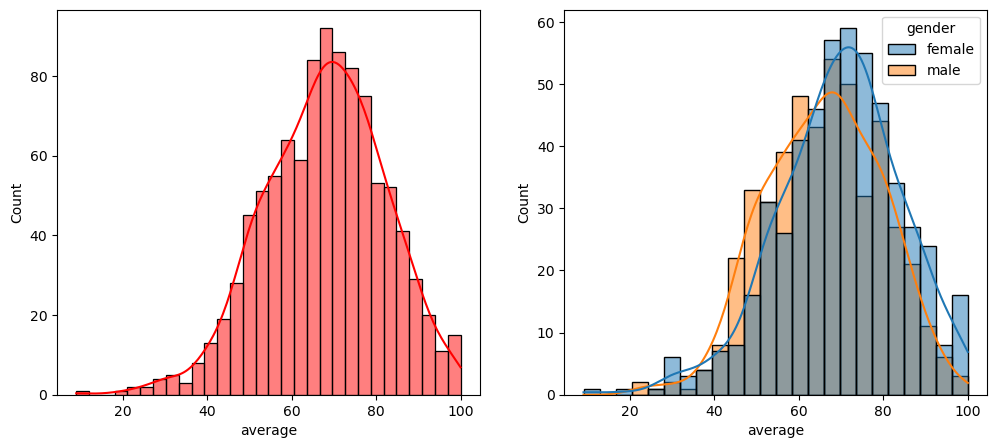

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,color='r',
             hue ='gender')
plt.show()

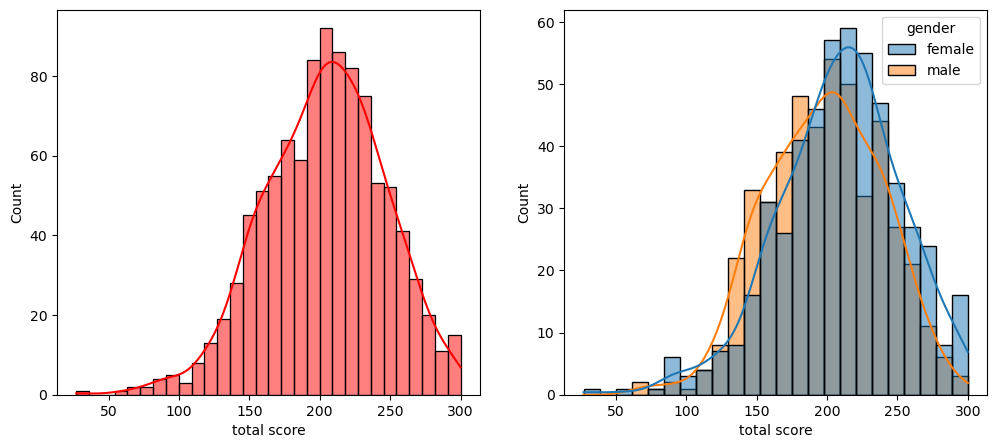

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,color='r',
             hue ='gender')
plt.show()